# Criando os nomes

In [1]:
import pandas as pd

In [6]:
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')

In [8]:
print(f'Quantidade de nomes: {len(nomes_f) + len(nomes_m)} ')

Quantidade de nomes: 400 


In [9]:
frames = [nomes_f, nomes_m]

In [11]:
nomes = pd.concat(frames)['nome'].to_frame()

In [13]:
nomes.sample(5)

,nome
27,GUILHERME
181,YURI
30,ELIANE
59,MANUEL
73,JANAINA


# Incluindo ID dos alunos

In [14]:
import numpy as np

In [15]:
np.random.seed(123)

In [16]:
total_alunos = len(nomes)
total_alunos

400

In [17]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [18]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [19]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [21]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [22]:
nomes['e-mail'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [23]:
nomes.sample(5)

,nome,id_aluno,dominio,e-mail
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Criando a Tabela Cursos

In [ ]:
!pip install html5lib
!pip install lxml

In [25]:
import html5lib

In [27]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [28]:
type(cursos)

list

In [29]:
cursos = cursos[0]

In [30]:
type(cursos)

pandas.core.frame.DataFrame

In [31]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o Index de Cursos

In [33]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [34]:
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [35]:
cursos['id_curso'] = cursos.index + 1

In [36]:
cursos.head(2)

,nome_do_curso,id_curso
0,Lógica de programação,1
1,Java para Web,2


In [37]:
cursos = cursos.set_index('id_curso')

In [38]:
cursos.head(2)

,nome_do_curso
id_curso,
1,Lógica de programação
2,Java para Web


# Matriculando os Alunos nos Cursos

In [43]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [44]:
nomes.sample(5)

,nome,id_aluno,dominio,e-mail,matriculas
67,HENRIQUE,64,@dominiodoemail.com.br,henrique@dominiodoemail.com.br,4
102,MARILENE,149,@dominiodoemail.com.br,marilene@dominiodoemail.com.br,1
49,ALEX,337,@dominiodoemail.com.br,alex@dominiodoemail.com.br,1
8,PATRICIA,379,@servicodoemail.com,patricia@servicodoemail.com,5
89,JEAN,89,@dominiodoemail.com.br,jean@dominiodoemail.com.br,2


In [45]:
nomes.matriculas.describe()

count    400.000000
mean       2.030000
std        1.493209
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       13.000000
Name: matriculas, dtype: float64

In [46]:
import seaborn as sns

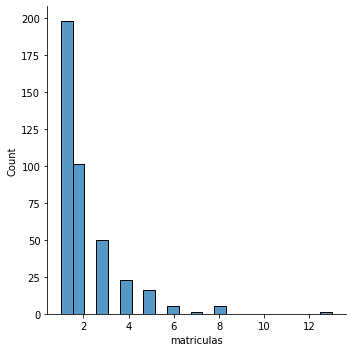

In [47]:
sns.displot(nomes.matriculas)

In [48]:
nomes.matriculas.value_counts()

1     198
2     101
3      50
4      23
5      16
8       5
6       5
13      1
7       1
Name: matriculas, dtype: int64

# Selecionando Cursos

In [49]:
nomes.sample(5)

,nome,id_aluno,dominio,e-mail,matriculas
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br,2
18,RAIMUNDO,70,@dominiodoemail.com.br,raimundo@dominiodoemail.com.br,1
8,PATRICIA,379,@servicodoemail.com,patricia@servicodoemail.com,5
3,ANTONIA,156,@dominiodoemail.com.br,antonia@dominiodoemail.com.br,1
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com,1


In [50]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [51]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [52]:
matriculas.head()

,id_aluno,id_curso
0,235,15
1,235,11
2,235,1
3,43,15
4,43,11


In [57]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno' : 'quantidade_de_alunos'})
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,49,Lógica de programação
2,42,Java para Web
3,21,C# para Web
4,4,Ruby on Rails
5,42,Cursos de Python
6,25,PHP com MySql
7,60,.NET para web
8,53,Novas integrações com Java
9,4,TDD com Java


# Saída em Diferentes Formatos

In [58]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,49,Lógica de programação
2,42,Java para Web
3,21,C# para Web


In [60]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [61]:
matriculas_json = matriculas_por_curso.to_json()

In [65]:
matriculas_json

'{"quantidade_de_alunos":{"1":49,"2":42,"3":21,"4":4,"5":42,"6":25,"7":60,"8":53,"9":4,"10":59,"11":66,"12":65,"13":21,"14":67,"15":89,"16":58,"17":66,"18":3,"19":13,"20":5},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [63]:
matriculas_html = matriculas_por_curso.to_html()

In [66]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>49</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>42</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>21</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>42</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>25</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>60</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>53</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>4</td>
  

# Criando o Banco SQL

In [ ]:
!pip install sqlalchemy

In [68]:
from sqlalchemy import create_engine, MetaData, Table

In [69]:
engine = create_engine('sqlite:///:memory:')

In [70]:
engine

Engine(sqlite:///:memory:)

In [71]:
type(engine)

sqlalchemy.engine.base.Engine

In [72]:
matriculas_por_curso.to_sql('matriculas', engine)

In [73]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Buscando do Banco SQL

In [77]:
query = 'SELECT * FROM matriculas WHERE quantidade_de_alunos < 20'

In [78]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,4,4,Ruby on Rails
1,9,4,TDD com Java
2,18,3,Programação funcional
3,19,13,Boas práticas em Java
4,20,5,Orientação objetos com Java


In [82]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,49
1,Java para Web,42
2,C# para Web,21
3,Ruby on Rails,4
4,Cursos de Python,42
5,PHP com MySql,25
6,.NET para web,60
7,Novas integrações com Java,53
8,TDD com Java,4
9,Código limpo com C#,59


In [83]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])
muitas_matriculas.query('quantidade_de_alunos > 60')

,nome_do_curso,quantidade_de_alunos
10,Preparatório para certificação Java,66
11,Hardware básico,65
13,Desenvolvendo jogos,67
14,Análise de dados,89
16,Internet das coisas,66


# Escrevendo no Banco

In [84]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [88]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Nomes dos Alunos e Alunas da Próxima Turma

In [90]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,49,Lógica de programação
2,42,Java para Web
3,21,C# para Web
4,4,Ruby on Rails
5,42,Cursos de Python
6,25,PHP com MySql
7,60,.NET para web
8,53,Novas integrações com Java
9,4,TDD com Java


In [91]:
matriculas

,id_aluno,id_curso
0,235,15
1,235,11
2,235,1
3,43,15
4,43,11
...,...,...
807,323,13
808,383,12
809,383,15
810,366,5


In [92]:
id_curso = 16
proxima_turma = matriculas.query(f'id_curso == {id_curso}')
proxima_turma

,id_aluno,id_curso
34,42,16
47,16,16
95,37,16
105,241,16
108,249,16
112,276,16
115,281,16
120,14,16
136,278,16
153,203,16


In [93]:
nomes.sample(3)

,nome,id_aluno,dominio,e-mail,matriculas
58,DAVI,131,@servicodoemail.com,davi@servicodoemail.com,1
122,ADAO,234,@dominiodoemail.com.br,adao@dominiodoemail.com.br,2
123,EVANDRO,52,@dominiodoemail.com.br,evandro@dominiodoemail.com.br,2


In [94]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,e-mail,matriculas
id_aluno,,,,,
11,16,PAULO,@servicodoemail.com,paulo@servicodoemail.com,3
14,16,SUELI,@dominiodoemail.com.br,sueli@dominiodoemail.com.br,3
16,16,CLAUDIA,@servicodoemail.com,claudia@servicodoemail.com,2
23,16,NEUZA,@servicodoemail.com,neuza@servicodoemail.com,3
30,16,SEBASTIANA,@dominiodoemail.com.br,sebastiana@dominiodoemail.com.br,13
30,16,SEBASTIANA,@dominiodoemail.com.br,sebastiana@dominiodoemail.com.br,13
30,16,SEBASTIANA,@dominiodoemail.com.br,sebastiana@dominiodoemail.com.br,13
36,16,KARINA,@dominiodoemail.com.br,karina@dominiodoemail.com.br,1
37,16,ANDREIA,@dominiodoemail.com.br,andreia@dominiodoemail.com.br,4


In [95]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
11          PAULO
14          SUELI
16        CLAUDIA
23          NEUZA
30     SEBASTIANA
30     SEBASTIANA
30     SEBASTIANA
36         KARINA
37        ANDREIA
40     WELLINGTON
40     WELLINGTON
42        VANESSA
93        MATHEUS
98       JEFERSON
136         JAIRO
137         DALVA
141         PABLO
142        GILMAR
146      LUCILENE
150      DOMINGOS
154     CRISTIANO
161       TATIANA
170     REGINALDO
171        ROSELI
183      VINICIUS
186        FLAVIO
189        PAMELA
197     ELIZABETE
199         ARTUR
201       BARBARA
203       TATIANE
203       TATIANE
203       TATIANE
207         DAVID
210         JULIO
225          YURI
231        WALTER
241         LUCIA
248       JOAQUIM
249        ANGELA
256        RUBENS
264        TERESA
270         MARCO
276         LUZIA
278       SILVANA
281        REGINA
283          CAIO
283          CAIO
285         VANIA
286        RAISSA
308       REGIANE
308       REGIANE
309        MATEUS
321      FERNANDO
323       MICHAEL
3

In [96]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
11,PAULO
14,SUELI
16,CLAUDIA
23,NEUZA
30,SEBASTIANA
30,SEBASTIANA
30,SEBASTIANA
36,KARINA
37,ANDREIA


In [97]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [98]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [99]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [102]:
proxima_turma = proxima_turma.rename(columns={'nome' : f'Alunos do Curso de {nome_curso}'})

In [103]:
proxima_turma.sample(6)

,Alunos do Curso de Estatística básica
id_aluno,
154,CRISTIANO
270,MARCO
11,PAULO
36,KARINA
98,JEFERSON
283,CAIO


# Excel

In [104]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)